In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load image (grayscale for SIFT)
img2 = cv2.imread('/content/13.jpg', cv2.IMREAD_GRAYSCALE)

# Check if image is loaded
print(img2.shape)

(1000, 750)


In [ ]:
# Create rotated versions of the image
img_90  = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
img_180 = cv2.rotate(img2, cv2.ROTATE_180)
img_270 = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [ ]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp2, des2 = sift.detectAndCompute(img2, None)
kp90, des90 = sift.detectAndCompute(img_90, None)
kp180, des180 = sift.detectAndCompute(img_180, None)
kp270, des270 = sift.detectAndCompute(img_270, None)

In [ ]:
# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

In [ ]:
# Apply KNN matching
matches_90  = bf.knnMatch(des2, des90, k=2)
matches_180 = bf.knnMatch(des2, des180, k=2)
matches_270 = bf.knnMatch(des2, des270, k=2)

In [ ]:
# Ratio test function
def ratio_test(matches, ratio=0.75):
    good_matches = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)
    return good_matches

good_90  = ratio_test(matches_90)
good_180 = ratio_test(matches_180)
good_270 = ratio_test(matches_270)

In [ ]:
# Draw matches
img_match_90 = cv2.drawMatches(img2, kp2, img_90, kp90, good_90, None, flags=2)
img_match_180 = cv2.drawMatches(img2, kp2, img_180, kp180, good_180, None, flags=2)
img_match_270 = cv2.drawMatches(img2, kp2, img_270, kp270, good_270, None, flags=2)

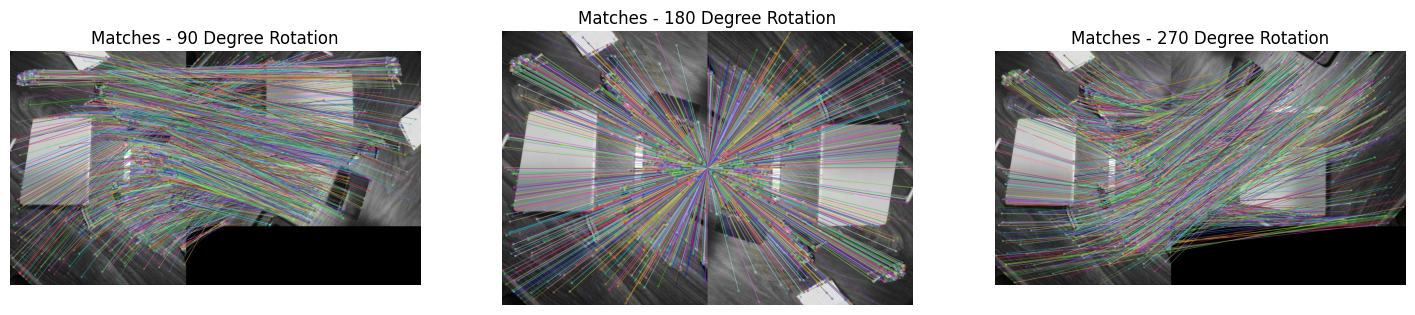

In [ ]:
# Display results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_match_90)
plt.title("Matches - 90 Degree Rotation")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_match_180)
plt.title("Matches - 180 Degree Rotation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_match_270)
plt.title("Matches - 270 Degree Rotation")
plt.axis("off")

plt.show()

In [ ]:
# Print number of good matches
print("Good matches (90°): ", len(good_90))
print("Good matches (180°):", len(good_180))
print("Good matches (270°):", len(good_270))

Good matches (90°):  1505
Good matches (180°): 1483
Good matches (270°): 1514
